In [1]:
import cmocean.cm as cm
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [3]:
kk = np.array([0.74711466, 3.54136997, 0.37895037, 7.19318921, 0.42550747])

In [4]:
def growth(k, pH, co2):
    mm = co2/(k[1] + co2)
    tt = k[0] * (1 + k[2] * (1 + np.tanh((pH - k[3]) / k[4])))
    return mm * tt, mm, tt

In [5]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

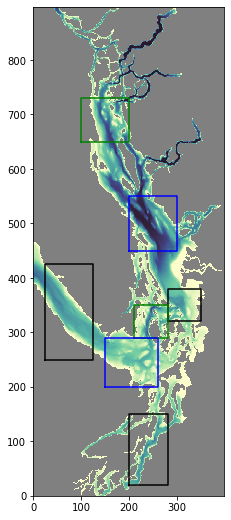

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
SoG_center = [450, 550, 200, 300]
plot_box(ax, SoG_center, 'b')
SoG_north = [650, 730, 100, 200]
plot_box(ax, SoG_north, 'g')
SoG_south = [320, 380, 280, 350]
plot_box(ax, SoG_south, 'k')
Haro_Boundary = [290, 350, 210, 280]
plot_box(ax, Haro_Boundary, 'g')
JdF_east = [200, 290, 150, 260]
plot_box(ax, JdF_east, 'b')
JdF_west = [250, 425, 25, 125]
plot_box(ax, JdF_west, 'k')
PS_main = [20, 150, 200, 280]
plot_box(ax, PS_main, 'k')
SS_all = [0, 898, 0, 398]
boxes = [SS_all, SoG_south,SoG_center, SoG_north, PS_main, Haro_Boundary, JdF_west, JdF_east]
boxnames = ['SS_all', 'SoG_south', 'SoG_center', 'SoG_north', 'PS_main', 'Haro_Boundary',
           'JdF_west', 'JdF_east']

In [7]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
def get_diatoms(files):
    diatoms = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        diatoms.append(neutral.diatoms[0, 0:5, SoG_center[0]:SoG_center[1], 
                               SoG_center[2]:SoG_center[3]].mean(axis=0).mean(axis=0).mean(axis=0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return diatoms, times  

In [8]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/noI/SalishSea_1d*ptrc*.nc'))
diatoms_noI, times_noI = get_diatoms(files)

In [9]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_noI/SalishSea_1d*ptrc*.nc'))
diatoms_PI_noI, times_PI_noI = get_diatoms(files)

In [27]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d*ptrc*.nc'))
diatoms_Lb80, times_Lb80 = get_diatoms(files)

In [25]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d*ptrc*.nc'))
diatoms_PI_Lb80, times_PI_Lb80 = get_diatoms(files)

In [23]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/wC90/SalishSea_1d*ptrc*.nc'))
diatoms_wC90, times_wC90 = get_diatoms(files)

In [20]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_wC90/SalishSea_1d*ptrc*.nc'))
diatoms_PI_wC90, times_PI_wC90 = get_diatoms(files)

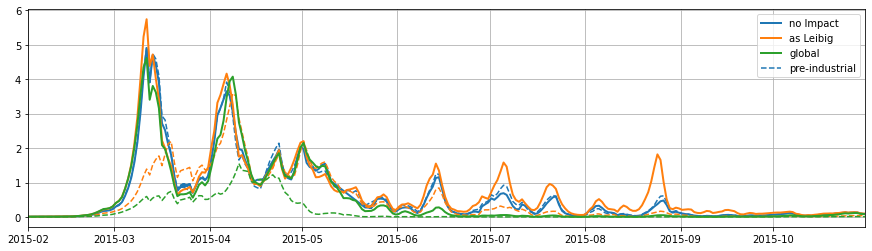

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
blue, = ax.plot(times_noI, diatoms_noI, '-', c='tab:blue', linewidth=2)
bluedsh, = ax.plot(times_PI_noI, diatoms_PI_noI, '--', c='tab:blue')
orange, = ax.plot(times_Lb80, diatoms_Lb80, '-', c='tab:orange', linewidth=2)
orangedsh, = ax.plot(times_PI_Lb80, diatoms_PI_Lb80, '--', c='tab:orange')
green, = ax.plot(times_wC90, diatoms_wC90, '-', c='tab:green', linewidth=2)
greendsh, = ax.plot(times_PI_wC90, diatoms_PI_wC90, '--', c='tab:green')
ax.legend([blue, orange, green, bluedsh, orangedsh], 
          ["no Impact", "as Leibig", 'global', 'pre-industrial']);
ax.set_xlim((dt.datetime(2015, 2, 1), dt.datetime(2015, 10, 31)))
ax.grid();

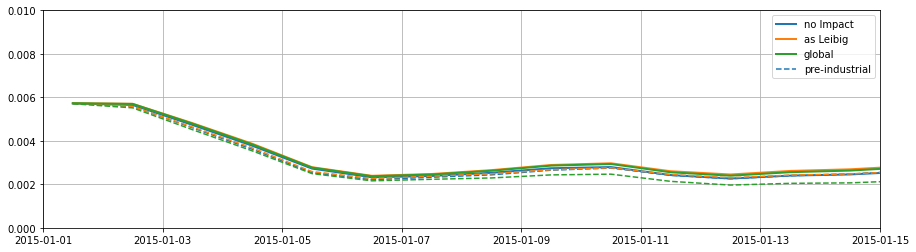

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
blue, = ax.plot(times_noI, diatoms_noI, '-', c='tab:blue', linewidth=2)
bluedsh, = ax.plot(times_PI_noI, diatoms_PI_noI, '--', c='tab:blue')
orange, = ax.plot(times_Lb80, diatoms_Lb80, '-', c='tab:orange', linewidth=2)
orangedsh, = ax.plot(times_PI_Lb80, diatoms_PI_Lb80, '--', c='tab:orange')
green, = ax.plot(times_wC90, diatoms_wC90, '-', c='tab:green', linewidth=2)
greendsh, = ax.plot(times_PI_wC90, diatoms_PI_wC90, '--', c='tab:green')
ax.legend([blue, orange, green, bluedsh], 
          ["no Impact", "as Leibig", 'global', 'pre-industrial']);
ax.set_xlim((dt.datetime(2015, 1, 1), dt.datetime(2015, 1, 15)))
ax.set_ylim((0, 0.01))
ax.grid();

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
files = glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/noI/SalishSea_1d*ptrc*.nc')
for file in files:
    neutral = xr.open_dataset(file)
    flags = neutral.flagellates[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]].mean(axis=0).mean(axis=0).mean(axis=0)
    ax.plot(neutral.time_centered[0], flags, 'x', c='tab:blue')
files = glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/wC/SalishSea_1d*ptrc*.nc')
for file in files:
    forced = xr.open_dataset(file)
    flags = forced.flagellates[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]].mean(axis=0).mean(axis=0).mean(axis=0)
    ax.plot(forced.time_centered[0], flags, '+', c='tab:orange')

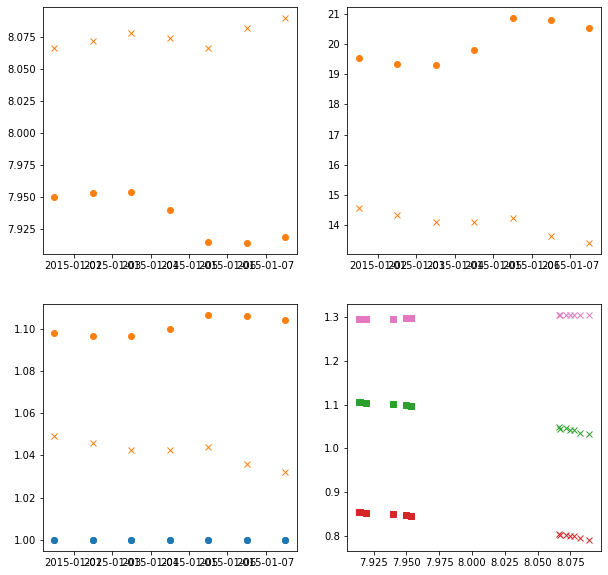

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
files = glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/wC/SalishSea_1d*carp*.nc')
for file in files:
    forced = xr.open_dataset(file)
    pH = forced.pH[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]].mean(axis=0).mean(axis=0).mean(axis=0)
    CO2 = np.nanmean(np.array(forced.CO2[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]])
           * np.array(tmask[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]]))
    zgrowth, mm, tt = growth(kk, pH.values, CO2)
    axs[0, 0].plot(forced.time_centered[0], pH, 'o', c='tab:orange')
    axs[0, 1].plot(forced.time_centered[0], CO2, 'o', c='tab:orange')
    axs[1, 0].plot(forced.time_centered[0], zgrowth, 'o', c='tab:orange')
    axs[1, 0].plot(forced.time_centered[0], np.ones_like(zgrowth), 'o', c='tab:blue')
    axs[1, 1].plot(pH, zgrowth, 's', c='tab:green')
    axs[1, 1].plot(pH, mm, 's', c='tab:red')
    axs[1, 1].plot(pH, tt, 's', c='tab:pink')
files = glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_wC/SalishSea_1d*carp*.nc')
for file in files:
    forced = xr.open_dataset(file)
    pH = forced.pH[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]].mean(axis=0).mean(axis=0).mean(axis=0)
    CO2 = np.nanmean(np.array(forced.CO2[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]])
           * np.array(tmask[0, 0:5, SoG_center[0]:SoG_center[1], 
                           SoG_center[2]:SoG_center[3]]))
    zgrowth, mm, tt = growth(kk, pH.values, CO2)
    axs[0, 0].plot(forced.time_centered[0], pH, 'x', c='tab:orange')
    axs[0, 1].plot(forced.time_centered[0], CO2, 'x', c='tab:orange')
    axs[1, 0].plot(forced.time_centered[0], zgrowth, 'x', c='tab:orange')
    axs[1, 0].plot(forced.time_centered[0], np.ones_like(zgrowth), 'o', c='tab:blue')
    axs[1, 1].plot(pH, zgrowth, 'x', c='tab:green')
    axs[1, 1].plot(pH, mm, 'x', c='tab:red')
    axs[1, 1].plot(pH, tt, 'x', c='tab:pink')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
blue, = ax.plot(times_noI, diatoms_noI, '-', c='tab:blue', linewidth=2)
bluedsh, = ax.plot(times_PI_noI, diatoms_PI_noI, '--', c='tab:blue')
orange, = ax.plot(times_Lb, diatoms_Lb, '-', c='tab:orange', linewidth=2)
orangedsh, = ax.plot(times_Lb90, diatoms_Lb90, '--', c='tab:orange')
green, = ax.plot(times_wC, diatoms_wC, '-', c='tab:green', linewidth=2)
olive, = ax.plot(times_wC95, diatoms_wC95, '-', c='tab:olive', linewidth=2)
darkgreen, = ax.plot(times_wC90, diatoms_wC90, '-', c='darkgreen', linewidth=2)
greendsh, = ax.plot(times_PI_wC, diatoms_PI_wC, '--', c='tab:green')
black, = ax.plot(times_Lb80, diatoms_Lb80, '-', c='k', linewidth=2)
black, = ax.plot(times_PI_Lb80, diatoms_PI_Lb80, '--', c='k')
ax.legend([blue, orange, green, bluedsh], 
          ["no Impact", "as Leibig", 'global', 'pre-industrial']);
ax.set_xlim((dt.datetime(2015, 2, 15), dt.datetime(2015, 3, 22)))
ax.grid();

At 100% peak was Feb 24, at 90% it is March 4 and base is Mar 11.  So again the same amount to match spring bloom.  

If wC is similar, we were at March 6, we what March 11.  So that is 5 days.  10% gave 8 days, to 5% should be pretty good.

wC is not similar.  Were at March 5, now at March 8.  So 3 days.  Need March 11.  So another 5%.